# Least Squares and bitcoin price

In [1]:
![bitcoin-rusia-regulacion-1000x570.jpg](attachment:bitcoin-rusia-regulacion-1000x570.jpg)

LoadError: UndefVarError: bitcoin not defined

The main purpose of this notebook is to characterize the bitcoin price (https://en.wikipedia.org/wiki/Bitcoin) using an standard approach such as least squares, we will cover both ordinary least squares and nonlinear least squares, also we will answer questions such as ¿Which variables can be correlated with bitcoin? ¿ Can bitcoin price be predictable within a nonlinear model?.

First of all we will start by showing which conditions sould the data of a problem meet in order to be solvable from least squares perspective just to familiarize with the least squares conditions if the reader wish to use it in his/her ideas; second we will try to adjust some nonlinear model to predict bitcoin and try to recognize some nonlinear relation between bitcoin price and the data; third using least squares we will see if there exists some correlation between bitcoin price and some commodities price such as the gold,silver and oil prices, or in other words can we use bitcoin price to predict oil,silver or gold prices and visceversa?; and fourth we will solve the pint registration problem with Umeyama's algorithm.

This jupyter notebook is going to be written in Julia, for documentation and more information about it please visit https://julialang.org/


# Data

The data used in this notebook was taken from https://es.investing.com/ in csv format:
 
 1. Bitcoin -> 
 2. Gold ->
 3. Silver ->
 4. Oil ->


# Importing and preprocessing data

Please make a directory called data and save in it all the csv files.

In [1]:
#Importing libraries
using CSV
using DataFrames
using Plots

In [2]:
# Importing bitcoin,gold,silver and oil data.
#-----------------------------------------------------------------------------------------------------------------
#Bitcoin data
dataBitcoin = CSV.read("data/Bitcoin.csv",DataFrame); #Creating dataframe object from csv file
dataBitcoin.Price .= replace.(dataBitcoin.Price, "," => ""); #Removing "," from the Price column
dataBitcoin.PriceFloat = parse.(Float64, dataBitcoin.Price); #Parsing price column to Float64
#------------------------------------------------------------------------------------------------------------------
#Gold data
dataGold = CSV.read("data/Gold.csv",DataFrame);
dataGold.Price .= replace.(dataGold.Price, "," => "");
dataGold.PriceFloat = parse.(Float64, dataGold.Price);
#------------------------------------------------------------------------------------------------------------------
#Oil data
dataOil = CSV.read("data/oil.csv",DataFrame)
dataOil.PriceFloat = dataOil.Price
#------------------------------------------------------------------------------------------------------------------
#Silver data
dataSilver = CSV.read("data/silver.csv",DataFrame)
dataSilver.PriceFloat = dataSilver.Price;
#-----------------------------------------------------------------------------------------------------------------
#Bitcoin data month
dataBitcoinMonth = CSV.read("data/BitcoinMes.csv",DataFrame); #Creating dataframe object from csv file
dataBitcoinMonth.Price .= replace.(dataBitcoinMonth.Price, "," => ""); #Removing "," from the Price column
dataBitcoinMonth.PriceFloat = parse.(Float64, dataBitcoinMonth.Price); #Parsing price column to Float64


Lets take a look to our bitcoin data:

In [5]:
dataBitcoin

,Date,Price,Open,High,Low,Vol.,Change %,PriceFloat
,String15,String15,String15,String15,String15,String7,String7,Float64
1,"Mar 25, 2021",51363.0,"52,347.2","52,926.0","50,874.0",11.59K,-1.88%,51363.0
2,"Mar 26, 2021",54992.9,"51,363.0","54,992.9","51,363.0",7.71K,7.07%,54992.9
3,"Mar 27, 2021",55886.0,"54,992.9","56,249.0","54,373.0",5.18K,1.62%,55886.0
4,"Mar 28, 2021",55773.0,"55,886.0","56,326.0","55,089.0",4.21K,-0.20%,55773.0
5,"Mar 29, 2021",57672.3,"55,773.0","58,162.0","54,984.0",10.12K,3.41%,57672.3
6,"Mar 30, 2021",58841.0,"57,672.3","59,349.0","57,278.0",7.87K,2.03%,58841.0
7,"Mar 31, 2021",58796.0,"58,841.0","59,453.0","57,698.0",8.12K,-0.08%,58796.0
8,"Apr 01, 2021",58727.4,"58,796.0","59,172.9","58,498.0",4.35K,-0.12%,58727.4
9,"Apr 02, 2021",58959.0,"58,727.4","59,834.0","58,727.4",6.15K,0.39%,58959.0


# 1. Conditions for a system to be solvable from least squares perspective

Least squares is a tecnique for solving overdetermined systems, which means sets of equations in which there are more equations thatn unknowns, for example:

$$y = 3x + 15$$
$$y = -5x + 1$$
$$y = 30x + 150$$

There we have 3 equations and 2 unknowns, thus this system is overdetermined, in our case consider $y$ is the bitcoin price and $x$ the day of the month.

The cases where the overdetermined systems have a solution are when the system contains enough linearly dependent equations so that the number of independent equations does not exceed the number of unknowns.

We are trying to solve

$$A^{T}Ax = A^{T}b$$

Where the combination of $Ax = b$ yield our system of equations, therefore if we wish to use least squares and this system is overdetermined (and indeed it is, becuase we have many data) we need the condtion stated above.



# 2. Nonlinear model fitting

Lets start by looking at the bitcoin price for 29 days

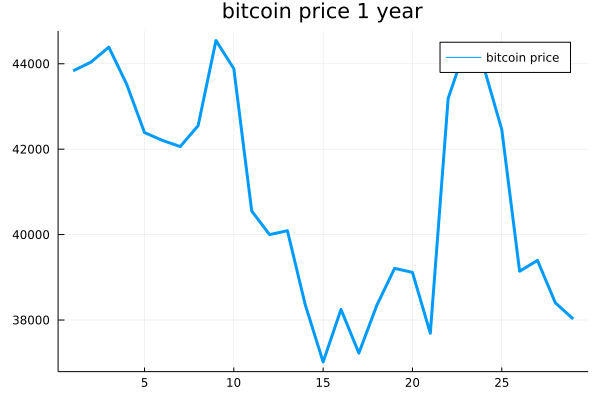

In [3]:
default(fmt = :png)
plot(dataBitcoinMonth.PriceFloat,title="bitcoin price 1 year", label="bitcoin price",lw=3)

We will try to fit the bitcoin price ($y$) to the following non-linear model using the days ($x$) as the predictors:

$$y = a +bx + cx^{2} + dx^{3} + ex^{4}(1)$$

Notice that the problem is to find $a,b,c,d,e$ that best fit the model, that means that leads to the minimal error.

First we will split the data into train and test, but before that we need to create a new column named day, that will work as our predictor.

In [24]:
N = size(dataBitcoinMonth.PriceFloat,1) # Number of days
x = Array((1:N)) # predictor variables
y = dataBitcoinMonth.PriceFloat;

Now we create a function for splitting the data into test and train, for this exercise I am going to use 90% of the data for training and 10% for testing:

We will begin by constructing our design matrixes: $A4$ will correspond to the $x^4$(1) function and $A5$ will corresponde to te $x^{5}$(2) function. 

In [33]:
A4 = [x.^0 x x.^2 x.^3 x.^4];
A5 = [x.^0 x x.^2 x.^3 x.^4 x.^5];

In [34]:
using Convex, SCS
function solvels(A,y)
    #Input -> A: Design matrix
    #      ->  y: Values to be predicted(array)
    
    #Output -> p: Best fit coefficients
        
    #Our variable to be predicted, in this case, the bitcoin price.
    b_t = y

    #Column vector variable of size n x 1.
    x_t = Variable(size(A,2))
    # The problem is to minimize ||Ax - b||^2 --> Least squares problem, so we minimize it, to obtain the coefficients
    #that better fits our model (minimal error).
    problem = minimize(square(norm(A*x_t-b_t)))
    solve!(problem, SCS.Optimizer, silent_solver = true)
    #problem.status 
    p = x_t.value
    
    return p 
end

solvels (generic function with 1 method)

Now we call the solver for finding our best fits.

In [35]:
p1 = solvels(A4,y);
p2 = solvels(A5,y);

┌ Warning: Problem status ALMOST_OPTIMAL; solution may be inaccurate.
└ @ Convex /home/alchemistdude/.julia/packages/Convex/uI27T/src/solution.jl:263
┌ Warning: Problem status ALMOST_OPTIMAL; solution may be inaccurate.
└ @ Convex /home/alchemistdude/.julia/packages/Convex/uI27T/src/solution.jl:263


Lets have a look to the coefficients:

In [38]:
p1

5×1 Array{Float64,2}:
 40918.35435749799
  2162.4663456868584
  -398.8359231623704
    21.96122685511365
    -0.3769421079151309

Now lets feed the models with the coefficients and the points (in our case, the days):

In [44]:
m4 = p1[1].*ones(N).+ p1[2].*x.^1 + p1[3].*x.^2 + p1[4].*x.^3 + p1[5].*x.^4
m5 = p2[1].*ones(N).+ p2[2].*x.^1 + p2[3].*x.^2 + p2[4].*x.^3 + p2[5].*x.^4 + p2[6].*x.^5;

Now lets plot the models and examine them

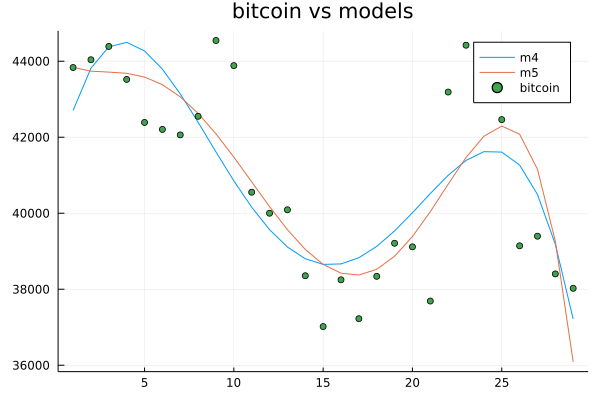

In [45]:
using Plots
default(fmt = :png)
plot(m4,title="bitcoin vs models", labels="m4")
plot!(m5,labels="m5")
scatter!(y,labels="bitcoin")

This seems to works "correctly" on predicting on the training data, let's test it:

In [46]:
days = [30,31,32,33,34,35]

6-element Array{Int64,1}:
 30
 31
 32
 33
 34
 35

In [47]:
m4_predict =p1[1].*ones(6).+ p1[2].*days.^1 + p1[3].*days.^2 + p1[4].*days.^3 + p1[5].*days.^4 # Function(1)
m5_predict =p2[1].*ones(6).+ p2[2].*days.^1 + p2[3].*days.^2 + p2[4].*days.^3 + p2[5].*days.^4 + p2[6].*days.^5 # Function(2)

6-element Array{Float64,1}:
  31266.70055883052
  24399.028438388486
  15023.557835327229
   2625.221313677146
 -13369.446125232615
 -33595.21030526003

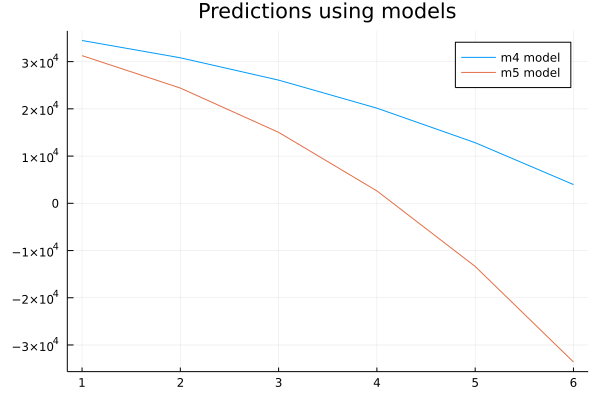

In [48]:
plot(m4_predict,title="Predictions using models",labels="m4 model")
plot!(m5_predict,labels="m5 model")

This is interesting, the model predict some negative values for the next six days on bitcoin price, this is a clear example of an overfitted model

# 3. Looking for a possible correlation between bitcoind and oil,silver,gold

Now we will try to see if there exists a correlation between the bitcoin price and some commodities(gold,silver,oil) using least squares, or in other words, we will try to fit a line that predicts bitcoin price tendency using as predictor variables the gold,oil and silver, by this we mean to see if the gold,oil and silver can predict the bitcoin price tendency.

In [44]:
function compact(df1,df2)
    
    #This function will take tow dataframes and make an inner join by the date
    
    #Input -> two dataframes
    #Output -> Two vectors, consisting each other of the dataframes original prices with the same dates.
    d1 = Array([])
    d2 = Array([])

    @time begin
    for i in 1:size(df1,1)
        for j in 1:size(df2,1)
            if df1.Date[i] == df2.Date[j]
                push!(d2,convert(Float64,df2.PriceFloat[j]))
                push!(d1,convert(Float64,df1.PriceFloat[i]))
            end
        end
    end
        d1 = convert(Array{Float64}, d1)
        d2 = convert(Array{Float64}, d2)
        
    end
    return d1,d2
    
    
    
end      

        

compact (generic function with 1 method)

We call the function to each commoditie along with the bitcoin data.

In [45]:
bitcoin1,gold = compact(dataBitcoin,dataGold)
bitcoin2,oil = compact(dataBitcoin,dataOil)
bitcoin3,silver = compact(dataBitcoin,dataSilver)

  0.028580 seconds (195.35 k allocations: 5.976 MiB)
  0.022032 seconds (191.59 k allocations: 5.859 MiB)
  0.025798 seconds (229.03 k allocations: 7.000 MiB)


([51363.0, 54992.9, 55773.0, 57672.3, 58841.0, 58796.0, 58727.4, 58240.0, 59145.0, 57991.0  …  39317.0, 41148.0, 40942.6, 41774.0, 41249.0, 41031.0, 42370.0, 42882.0, 44003.0, 43895.0], [25.108, 25.184, 25.082, 24.841, 24.209, 24.609, 25.02, 25.047, 24.855, 25.302  …  25.158, 24.71, 25.616, 25.087, 25.047, 25.313, 24.904, 25.189, 25.875, 25.85])

For solving this least squares problem we will use the QR factorization approach, for more information about it please visit https://towardsdatascience.com/qr-matrix-factorization-15bae43a6b2.

Recall fom above that we are trying to solve:

$$A^T A x = A^T b$$



In [53]:
using LinearAlgebra
function solveQR(df1,df2)
    #This function will solve the least squares problem via QR descomposition.
    #Input -> two dataframes
    #Output -> least squares solution
    N = size(df1,1)
    b = df2
    A = [ones(N) df1]
    
    qrA = qr(A)
    x = qrA\b
    
    return x,A,b,N
    
end
    

solveQR (generic function with 1 method)

Now we fit the data to solve the least squares problem

In [48]:
xbg,a1,b1,n1 = solveQR(bitcoin1,gold)
xbo,a2,b2,n2 = solveQR(oil,bitcoin2)
xbs,a3,b3,n3 = solveQR(silver,bitcoin3)

([77421.81201124124, -1248.8380727982367], [1.0 25.108; 1.0 25.184; … ; 1.0 25.875; 1.0 25.85], [51363.0, 54992.9, 55773.0, 57672.3, 58841.0, 58796.0, 58727.4, 58240.0, 59145.0, 57991.0  …  39317.0, 41148.0, 40942.6, 41774.0, 41249.0, 41031.0, 42370.0, 42882.0, 44003.0, 43895.0], 312)

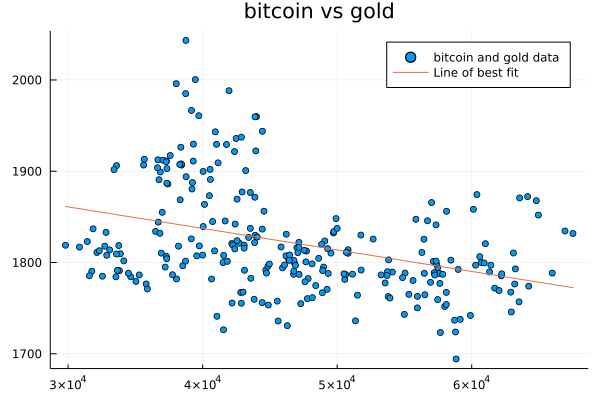

In [52]:
using Plots

#-----Bitcoin vs Gold--------------------------------------------------------------------------------------------
pred = xbg[2]*a1[:,2] + xbg[1]*ones(n1,1)
scatter(a1[:,2],b1,title="bitcoin vs gold",labels="bitcoin and gold data")
plot!(a1[:,2],pred,labels="Line of best fit")




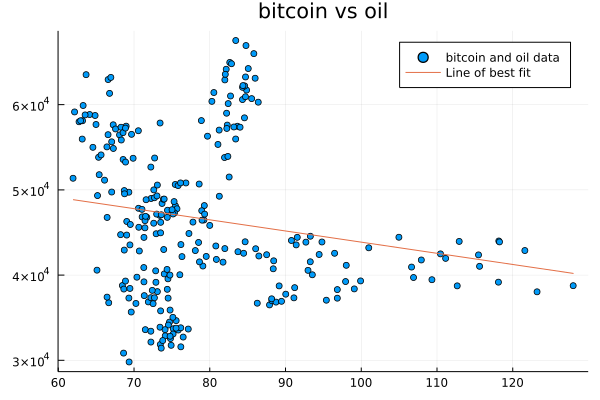

In [56]:
#-----Bitcoin vs Oil--------------------------------------------"bitcoin and oil data
pred = xbo[2]*a2[:,2] + xbo[1]*ones(n2,1)
scatter(a2[:,2],b2,title="bitcoin vs oil",labels="bitcoin and oil data")
plot!(a2[:,2],pred,labels="Line of best fit")

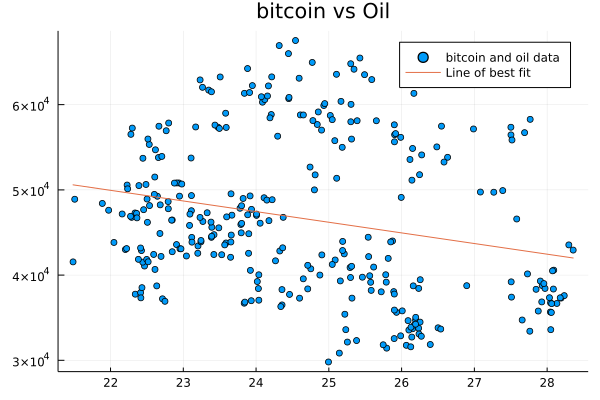

In [57]:
#-----Bitcoin vs Silver-----------------------------------------------------------------------------------------
pred = xbs[2]*a3[:,2] + xbs[1]*ones(n3,1)
scatter(a3[:,2],b3,title="bitcoin vs Oil",labels="bitcoin and oil data")
plot!(a3[:,2],pred,labels="Line of best fit")

Looking at the plots, we can conclude that bitcoin and gold have a small positive correlation, otherwise bitcoin and silver or bitcoin and oil does not seem to have any correlation, maybe the relatin between them is not linear.

# 4. Registration problem

In [71]:
using GeometryBasics
using Makie
positions = Observable(rand(GeometryBasics.Point2f, 1))
#positions = Observable([(0,0)])
draw = Array([])

fig, ax, p = Makie.scatter(positions)
on(events(fig).mousebutton, priority = 0) do event
    if event.button == Mouse.left
        if event.action == Mouse.press
            if Keyboard.a in events(fig).keyboardstate
                push!(positions[], mouseposition(ax.scene))
                push!(draw,mouseposition(ax.scene))
                notify(positions)
                return Consume(true)
            end
        end
    end
    return Consume(false)
end
display(fig)

┌ Info: Precompiling Makie [ee78f7c6-11fb-53f2-987a-cfe4a2b5a57a]
└ @ Base loading.jl:1260
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for th

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** i

ERROR: LoadError: LoadError: syntax: invalid keyword argument syntax "update"
Stacktrace:
 [1] top-level scope at Enums.jl:221
 [2] include(::Module, ::String) at ./Base.jl:377
 [3] include(::String) at /home/alchemistdude/.julia/packages/Makie/NL7Xw/src/Makie.jl:1
 [4] top-level scope at /home/alchemistdude/.julia/packages/Makie/NL7Xw/src/Makie.jl:143
 [5] include(::Module, ::String) at ./Base.jl:377
 [6] top-level scope at none:2
 [7] eval at ./boot.jl:331 [inlined]
 [8] eval(::Expr) at ./client.jl:449
 [9] top-level scope at ./none:3
in expression starting at /home/alchemistdude/.julia/packages/Makie/NL7Xw/src/display.jl:221
in expression starting at /home/alchemistdude/.julia/packages/Makie/NL7Xw/src/Makie.jl:143


ErrorException: [91mFailed to precompile Makie [ee78f7c6-11fb-53f2-987a-cfe4a2b5a57a] to /home/alchemistdude/.julia/compiled/v1.4/Makie/iZ1Bl_bOVGK.ji.[39m

In [821]:
x1,y1,N = castp(draw)

([0.0521724559366703, 0.05090876296162605, 0.049645066261291504, 0.047659266740083694, 0.04621504619717598, 0.045131880789995193, 0.043146081268787384, 0.04097975045442581, 0.04097975045442581, 0.039896585047245026  …  0.09784591197967529, 0.09297167509794235, 0.08557005226612091, 0.07997369021177292, 0.07690472155809402, 0.07365523278713226, 0.06715624034404755, 0.06192094087600708, 0.05849091708660126, 0.05578300729393959], [0.6904051303863525, 0.655075192451477, 0.6329940557479858, 0.6020803451538086, 0.5711666941642761, 0.5476134419441223, 0.5137556195259094, 0.4784257113933563, 0.4784257113933563, 0.4489841163158417  …  0.582943320274353, 0.6006082892417908, 0.6006082892417908, 0.6168011426925659, 0.649186909198761, 0.6786285042762756, 0.699237585067749, 0.7080700993537903, 0.7080700993537903, 0.7080700993537903], 59)

In [834]:
function transformation(x,y)
    # x : nx2
    t = rand(1)
    x2 = x.* t
    y2 = y.* t
    
    return x2,y2
end
    
    
    

transformation (generic function with 1 method)

In [838]:
x2,y2 = transformation(x1,y1)

([0.006039090269978583, 0.00589281469577342, 0.00574653869035673, 0.005516677504960143, 0.005349505420154242, 0.005224126356549817, 0.004994265171153231, 0.0047435070439443795, 0.0047435070439443795, 0.004618127980339954  …  0.01132590529590756, 0.010761700372110697, 0.00990494429990351, 0.009257151608857591, 0.008901910928645052, 0.00852577460025483, 0.007773500218628276, 0.007167501411206886, 0.006770467709792872, 0.006457020481993335], [0.07991609423793618, 0.0758265669080278, 0.0732706209510656, 0.06969228281254966, 0.06611395157341815, 0.06338760461973553, 0.05946847828654758, 0.05537895440633142, 0.05537895440633142, 0.05197101726453592  …  0.06747712505025948, 0.06952188871521366, 0.06952188871521366, 0.07139625138344742, 0.07514498361929936, 0.07855292076109487, 0.08093847262072106, 0.08196085790289036, 0.08196085790289036, 0.08196085790289036])

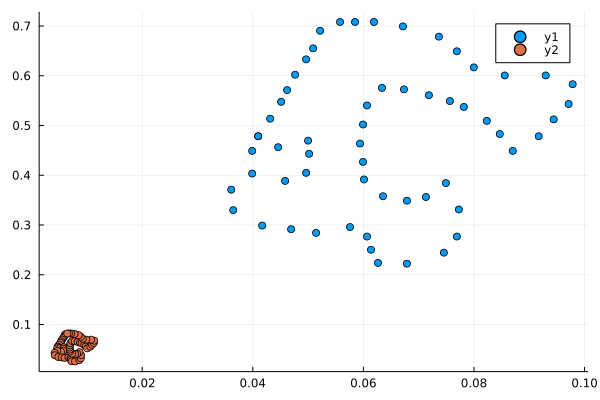

In [839]:
Plots.scatter(x1,y1)
Plots.scatter!(x2,y2)

In [840]:
A = [x1 y1]
B = [x2 y2]

59×2 Matrix{Float64}:
 0.00603909  0.0799161
 0.00589281  0.0758266
 0.00574654  0.0732706
 0.00551668  0.0696923
 0.00534951  0.066114
 0.00522413  0.0633876
 0.00499427  0.0594685
 0.00474351  0.055379
 0.00474351  0.055379
 0.00461813  0.051971
 0.00516144  0.052823
 0.00578833  0.0543566
 0.00580923  0.0512894
 ⋮           
 0.0109289   0.0592981
 0.0112423   0.0628764
 0.0113259   0.0674771
 0.0107617   0.0695219
 0.00990494  0.0695219
 0.00925715  0.0713963
 0.00890191  0.075145
 0.00852577  0.0785529
 0.0077735   0.0809385
 0.0071675   0.0819609
 0.00677047  0.0819609
 0.00645702  0.0819609

In [735]:
function umeyama(A,B)
    n,m = size(A)
    
    EA = mean(A,dims=1)
    EB = mean(B,dims=1)
    VarA = mean((norm.(A.-EA,2).^2)[:,2])
    
    H = (transpose((A.-EA)) * (B.-EB))/n
    U,D,VT=svd(H)
    d = sign(det(U)*det(VT))
    S = diagm(0 => ([1*(m-1), d]))
    R = U * S * VT
    c = VarA/tr(diagm(0 => (D))*S)
    t=EA.-EB*(c*R)
    
    return R,c,t
end
    
    
    

umeyama (generic function with 1 method)

In [841]:
R,c,t=umeyama(A,B)

([0.9999999999999997 2.636779683484747e-16; -1.6306400674181987e-16 0.9999999999999997], 8.514922383615845, [0.0009040355007690903 0.006816874149485397])

In [842]:
bx=Array([])
by=Array([])

for i in 1:size(B,1)
    aux = t.+c*R*B[i,:]
    xi = aux[1,1]
    yi = aux[2,2]
    push!(bx,xi)
    push!(by,yi)
end

bx = convert(Array{Float64}, bx)
by = convert(Array{Float64}, by)

59-element Vector{Float64}:
 0.6872962137872412
 0.6524742059873956
 0.6307105245471457
 0.6002412530353501
 0.5697720402712774
 0.5465574075698624
 0.513186351031182
 0.478364372605198
 0.478364372605198
 0.4493460523545677
 0.4566006617910867
 0.4696588706552366
 0.4435423941792139
 ⋮
 0.5117353997700168
 0.5422046712818124
 0.581379356621985
 0.5987903605219077
 0.5987903605219077
 0.6147504131606654
 0.6466705771859033
 0.6756888974365337
 0.6960016863633411
 0.7047072176871639
 0.7047072176871639
 0.7047072176871639

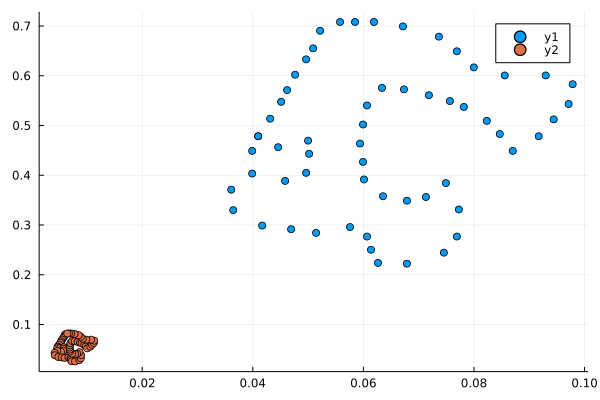

In [843]:
Plots.scatter(x1,y1)
Plots.scatter!(x2,y2)

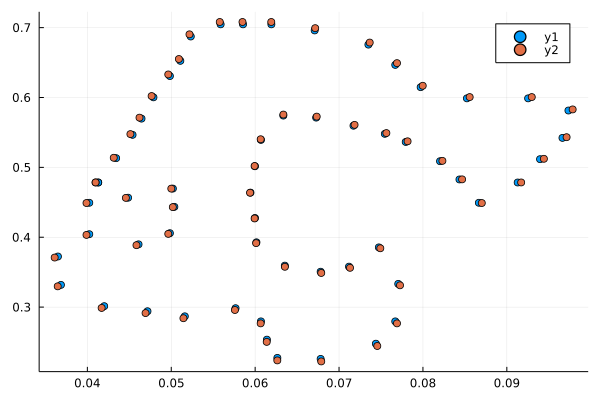

In [845]:
Plots.scatter(bx,by)
Plots.scatter!(x1,y1)